<center> <h1> Motoru cilindra spiediena datu analīze 

<center> <h2> Materiāli un metodes 

Šī darba mērķis ir nostiprināt un padziļināt zināšanas par sadedzes norisi kompresijas aizdedzes motorā. <br>

Dati iegūti, lietojot instrumentētu eksperimentālo motoru IDT-69. Šis motors ir analogs dīzeļdegvielas cetānskaitļa noteikšanas motoram CFR 5. <br>
Motora īpatnība ir dalīta sadegšanas kamera - to veido priekškamera un galvenā kamera. <br>
Priekškameras tilpumu var mainīt motora darba laikā. Līdz ar to motoram var mainīt kompresijas pakāpi, robežās no 7 līdz 23. <br>
Motors RTU iekšdedzes motoru zinātniskajā laboratorijā ir parādīts sekojošā attēlā:
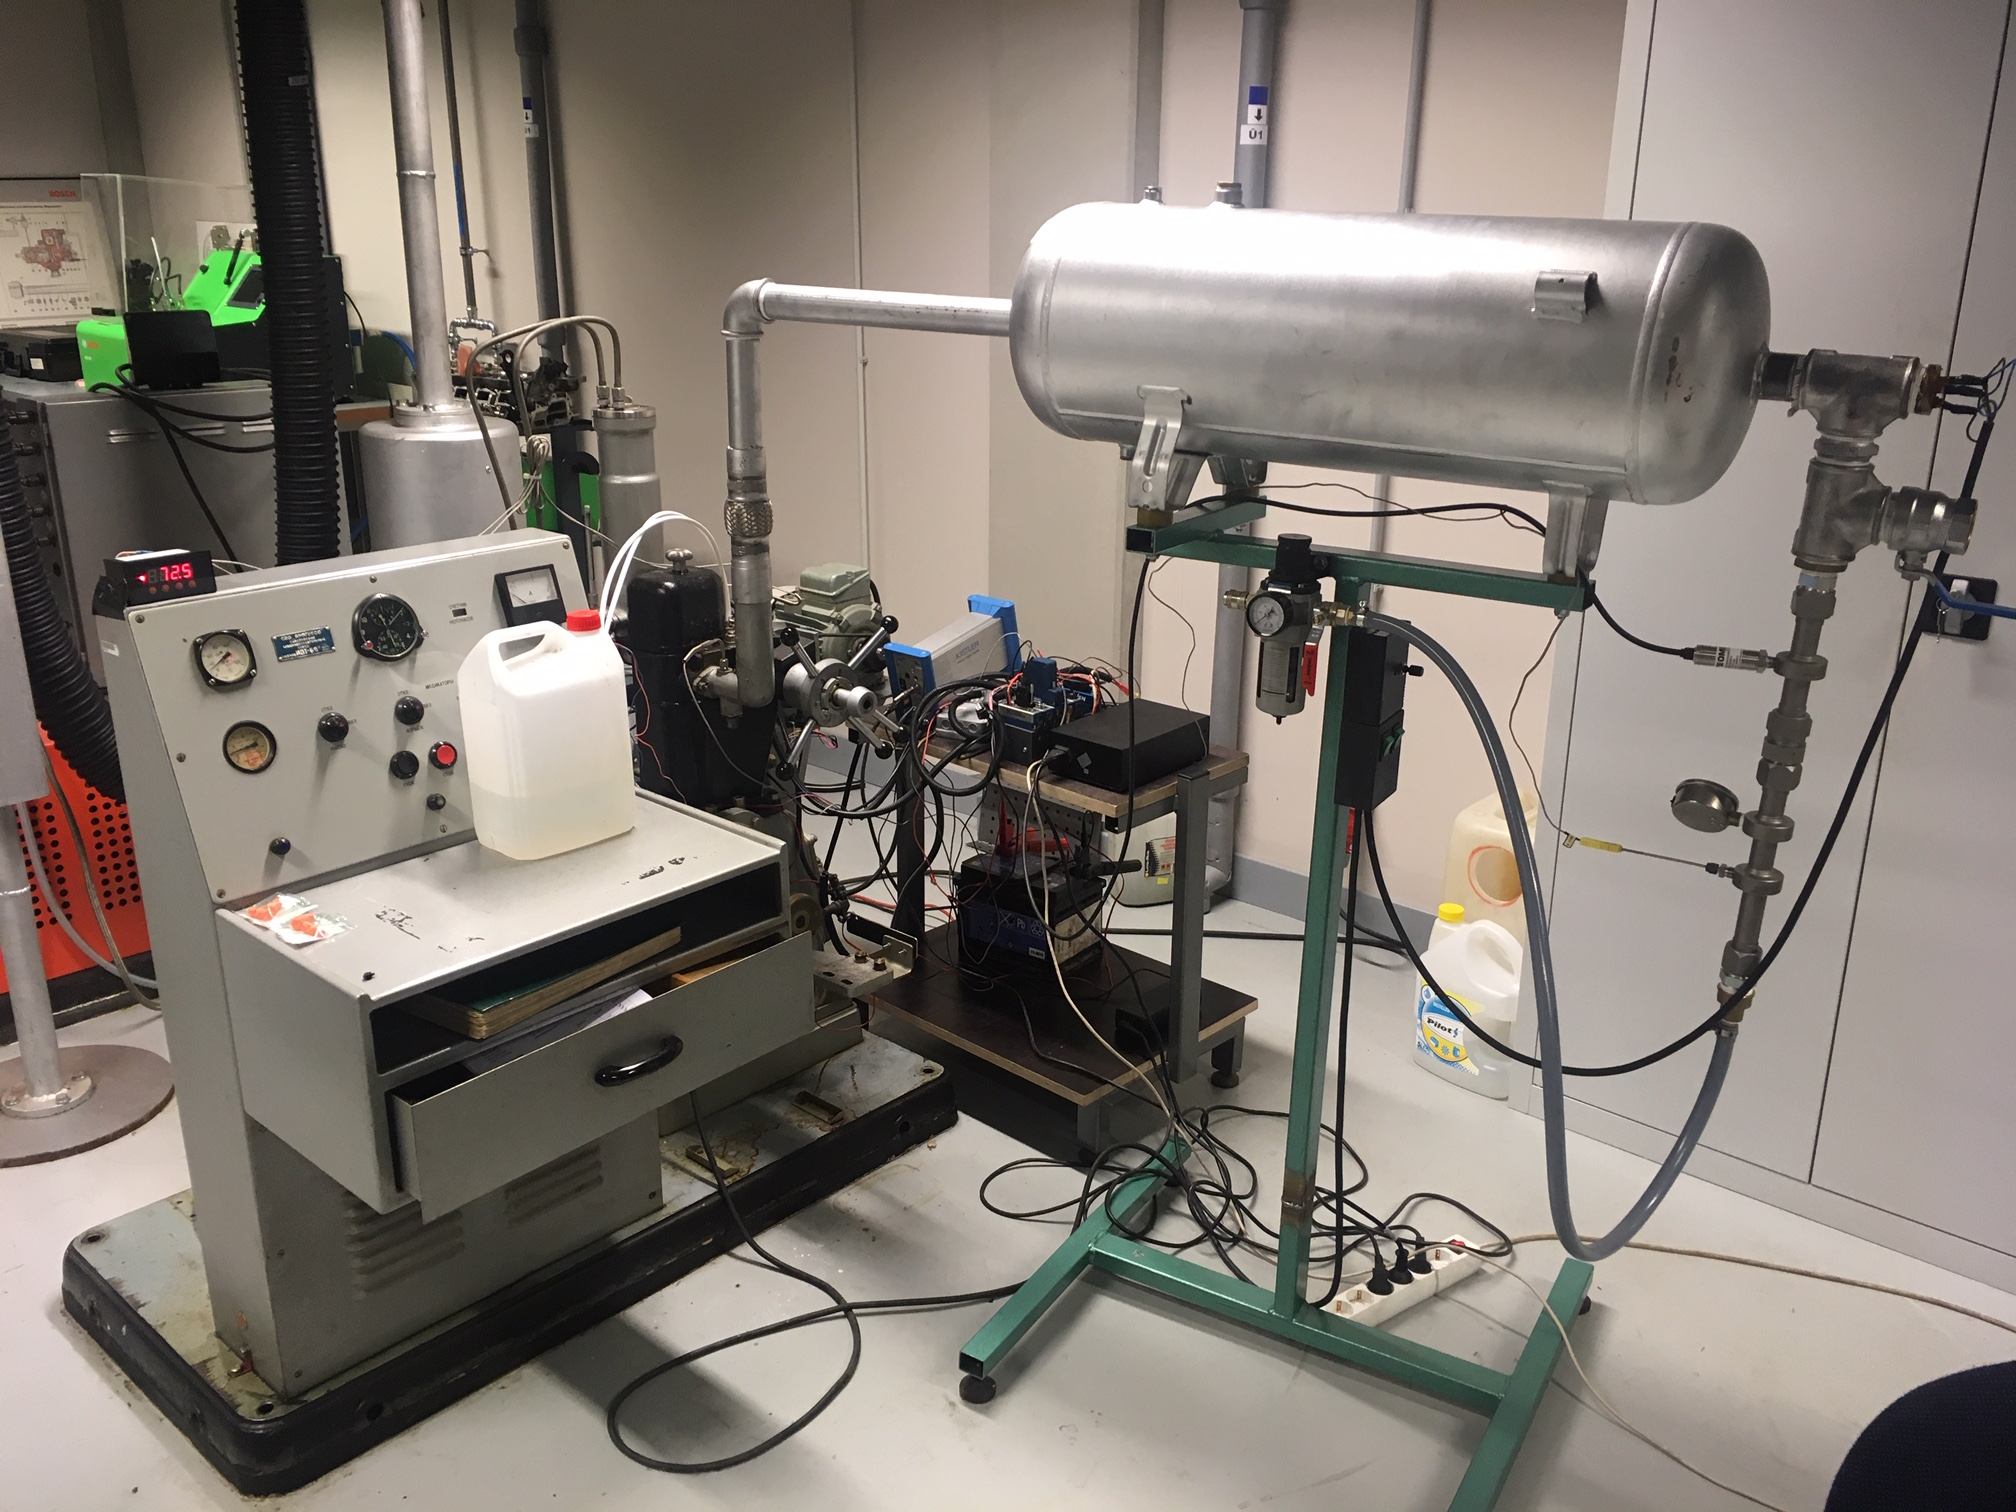   
<br>
<div align="center">  1. att. IDT 69 motors RTU iekšdedzes motoru zinātniskajā laboratorijā   <br>
<div align="left"> 
    
Motora galvenie parametri:
- veids: 4 taktu, kompresijas aizdedzes;
- cilindru skaits: 1;
- cilindra diametrs un virzuļa gājiens: 85 x 115 mm;
- klaņa garums: 266 mm;
- rotācijas ātrums: nemainīgs, 900 apgr/min.

Degvielas strūkla priekškamerā parādīta sekojošā attēlā: <br>
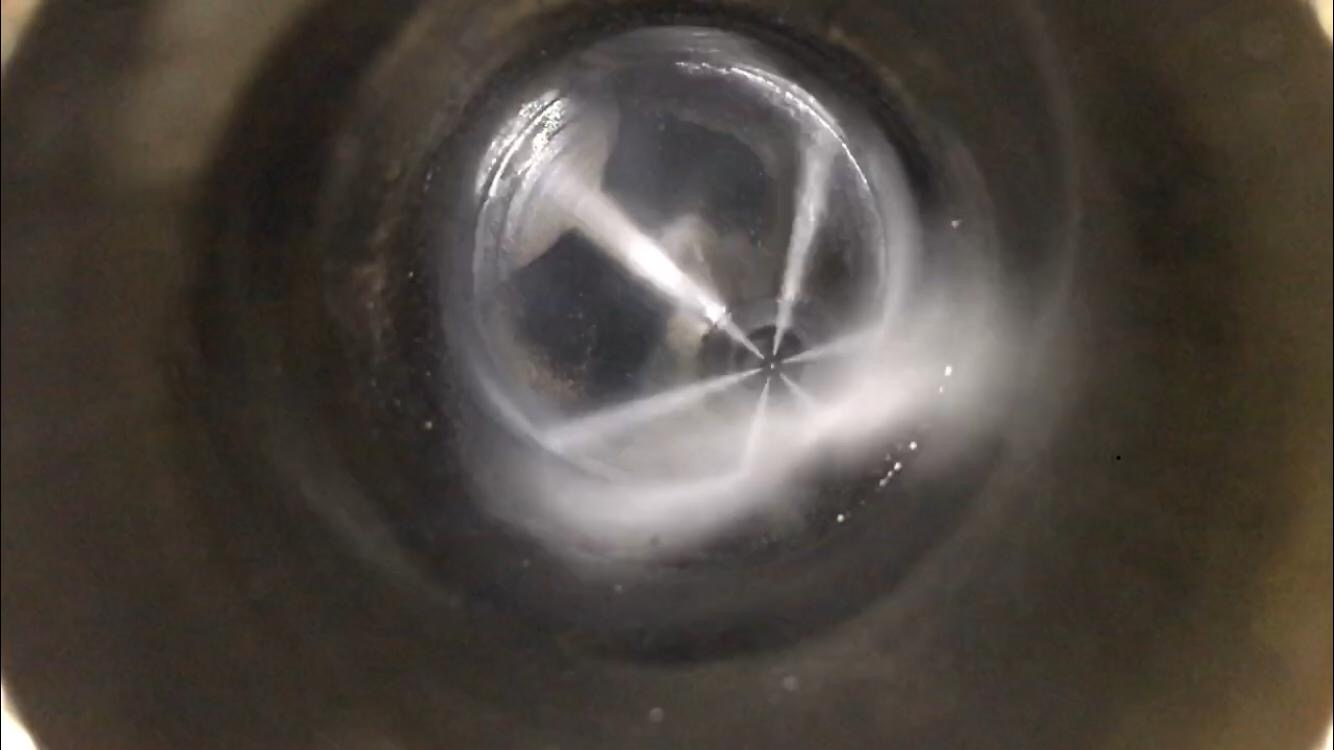 <br>
<div align="center">  2. att. Degvielas strūkla priekškamerā  <br>
<div align="left">  
    
***
Galvenie dati, kas iegūti izmēģinājumā, un tiks lietoti aprēķinam, ir ar kloķvārpstas rotāciju sinhronizēti gāzu spiediena mērījumi motora priekškamerā.
Datu ieguves iekārta parādīta sekojošā attēlā:
    
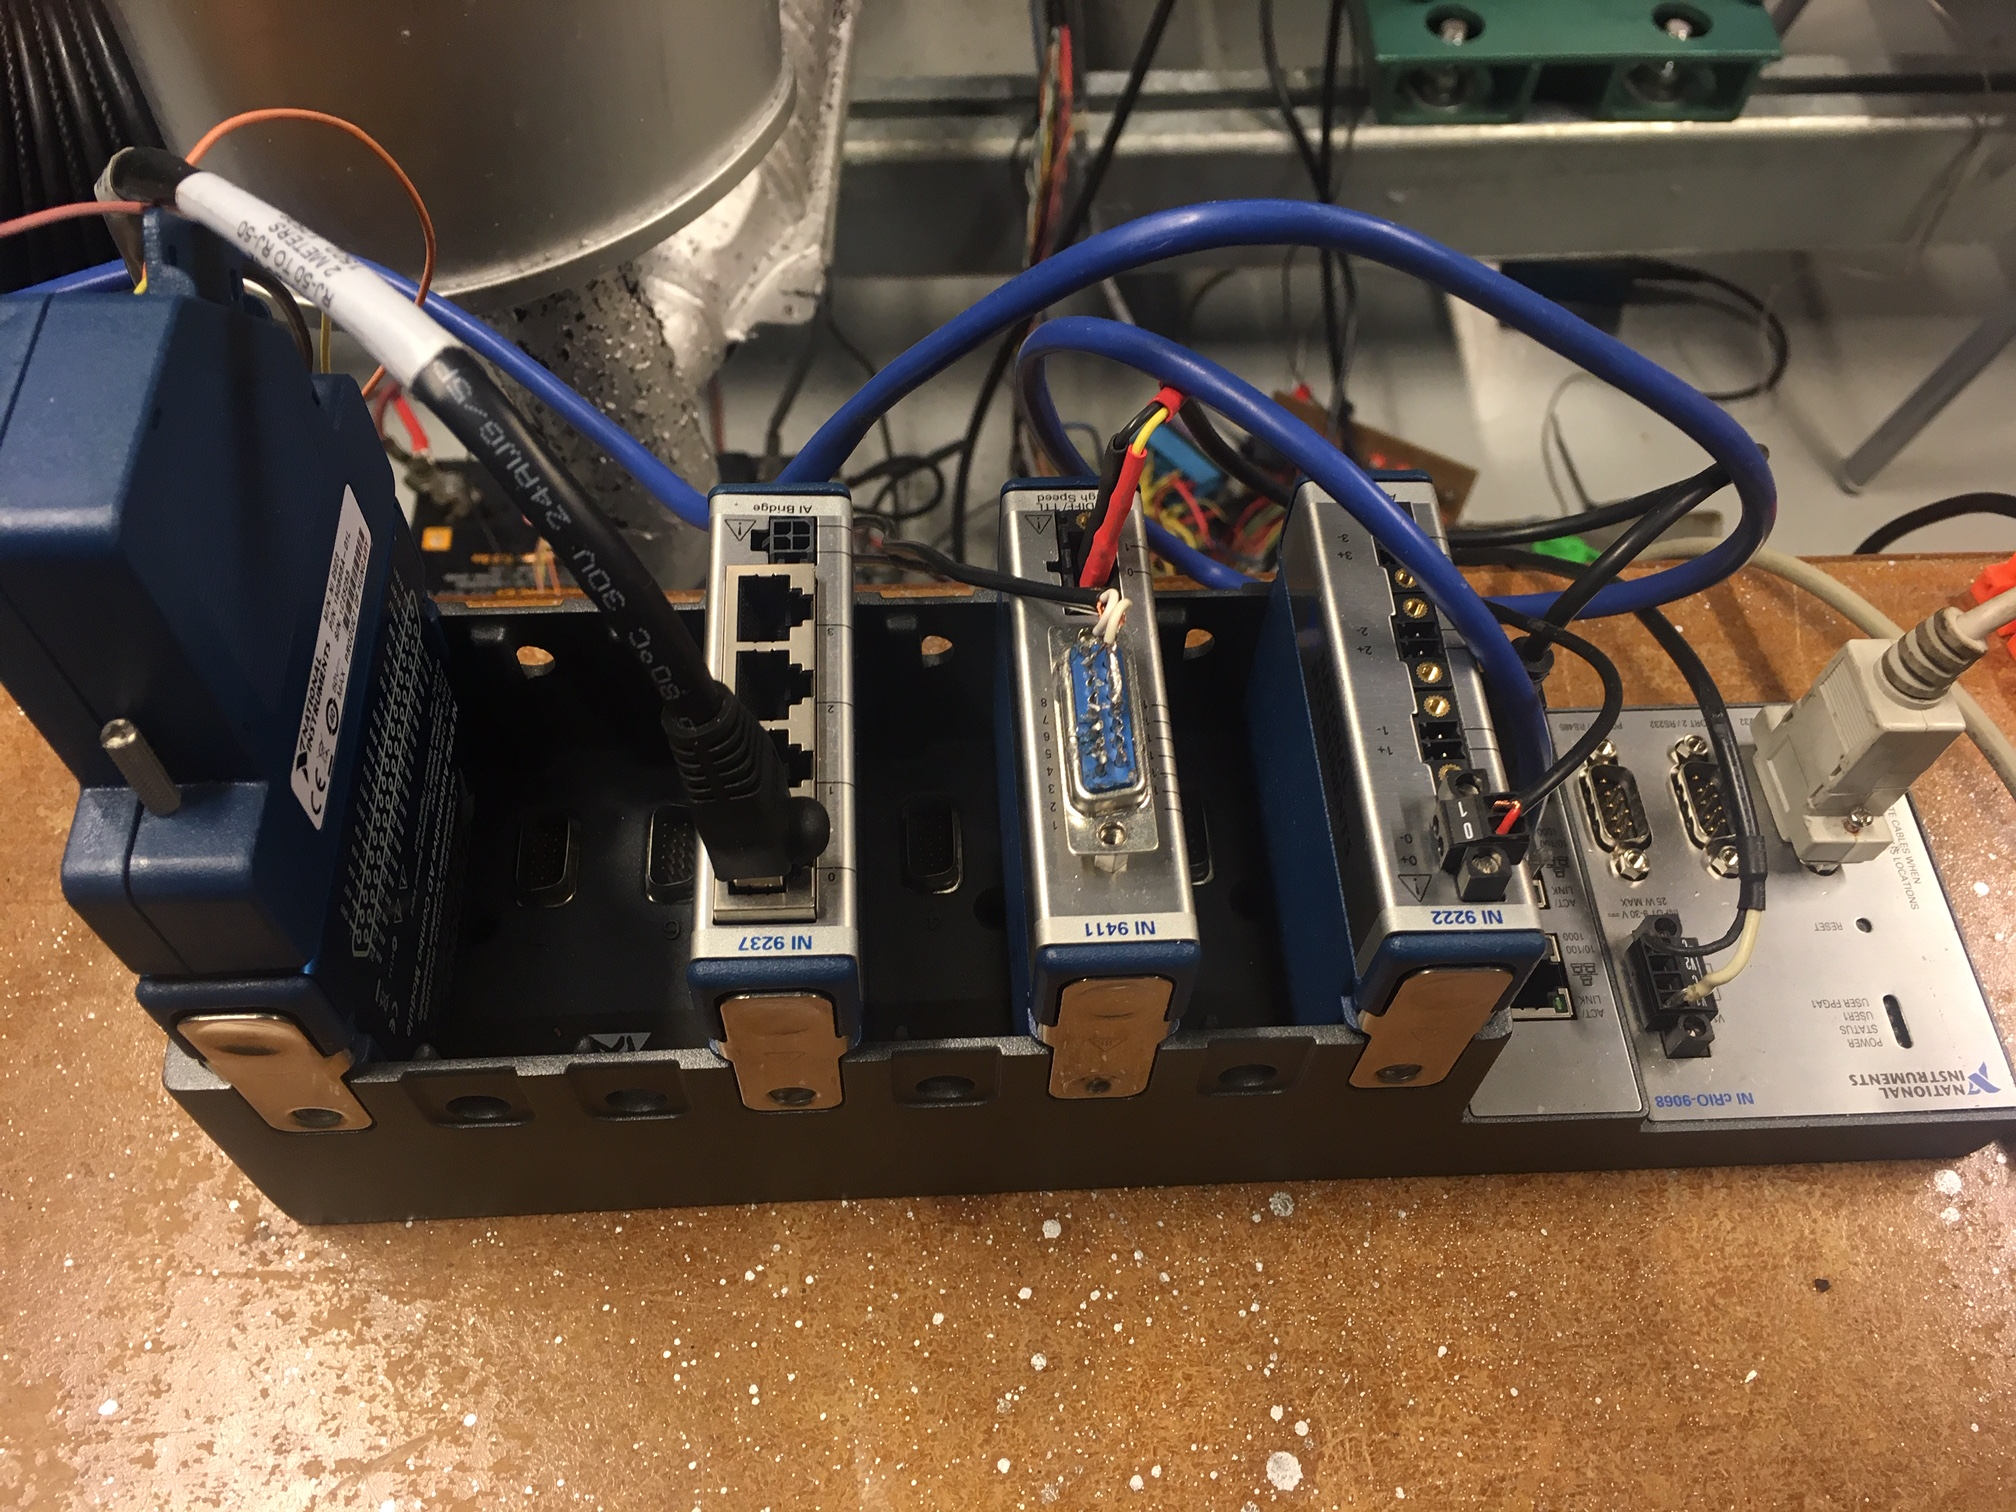 <br>
<div align="center">   3 att. Datu ieguves modulārā iekārta   <br>
<div align="left">  
    
***
    
Izmēģinājumi veikti sekojošos režīmos:

- Spiediens ieplūdes kolektorā: 1 bar;
- Gaisa temperatūra ieplūdes kolektorā: 65°C;
- Degviela - Neste Futura D, blīvums 824.4 $kg/m^3$, zemākā siltumspēja 43 MJ/kg;
- Degvielas patēriņš: 13 ml/ min;
- Degvielas iesmidzināšanas sākums: 5; 11; 15 grādi pirms AMP;
- Kompresijas pakāpe: 14 un 19.<br>

Papildus režīms ir bez degvielas iesmidzināšanas, tā saucamais motorings jeb brīvgriešana.<br>
Motors uzsildīts darba temperatūrā (dzesēšanas šķidruma temperatūra 100°C), ieregulēti degvielas padeves parametri un reģistrēti cilindra spiediena dati. <br>

Aprēķina piemērā veidosim kodu programmēšaanas valodā Python.<br>
Standarta Python videi pievienosim papildus funkciju bibliotēkas, kas atvieglo darbu inženieraprēķinu veikšanai.<br>

Aprēķinu sāksim, ielādējot datus izmēģinājuma režīmam ar kompresijas pakāpi 14.
Dati ir Matlab formātā, un tos jāpārveido Python piemērotā formātā.
Ar katru kompresijas pakāpi veikti četri izmēģinājumi, viens bez degvielas padeves (Motoring), un trīs ar degvielas padevi. Izmēģinājumi atšķiras ar iesmidzināšanas apsteidzes leņķi: 
- 5 grādi;
- 11 grādi;
- 15 grādi; <br>
pirms augstākā maiņas punkta. 
Katrā izmēģinājumā reģistrēti 150 motora darba cikli.<br>
No šīem datiem aprēķināta cilindra spiediena vidēja vērtība, katram datu punktam pie noteikta kloķvāprstas pagrieziena leņķa (CAD).

Lai aprēķinu veiktu ar datiem, kas iegūti ar kompresijas pakāpi 19, kodā jāizmaina kompresijas pakāpes vērtība (CR) un jāpalaiž aprēķins no jauna, (>>Cell >> Run All)


<center> <h1> Aprēķinu koda izveide

<center> <h2> Datu ielāde un sagatavošana

In [1]:
import numpy as np
import scipy.io as spio # to import matlab
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

# Initial parameters

CR=14 # compression ratio, other option CR=19

Speed=900 # rpm

if CR==14:
    Data = spio.loadmat('Data_CR14.mat')
elif CR==19:
    Data = spio.loadmat('Data_CR19.mat')

P_Test1 = Data ['P_mot'] # import variable from mat file
P_Test2 = Data ['P_adv5']
P_Test3 = Data ['P_adv11']
P_Test4 = Data ['P_adv15']

P_Test1=np.squeeze(P_Test1) #removes axes with length 1
P_Test2=np.squeeze(P_Test2)
P_Test3=np.squeeze(P_Test3)
P_Test4=np.squeeze(P_Test4)

Izpildot augšup esošo koda fragmentu, vizuālu pārmaiņu rezultātos nav, bet ir ielādētas bibliotēkas un mērījuma dati.<br>
Dati satur tikai spiediena mērījumus cilindrā.<br>
*** 
Nākamajā koda fragmentā:
- nozīmējam iesmidzināšanas sākuma leņķi (SOI - Start of Injection) katrā izmēģinājuma režīmā;
- izveidojam apzīmējumus grafikiem.

In [2]:
SOI_Test1=0 # start of injection, CAD BTDC
SOI_Test2=5
SOI_Test3=11
SOI_Test4=15

#label names

label_Test1='Motoring'
label_Test2='SOI 5'
label_Test3='SOI 11'
label_Test4='SOI 15'

#label arrays for plots
labels_line_all = [label_Test1, label_Test2, label_Test3, label_Test4]
labels_line_fired = [label_Test2, label_Test3, label_Test4]

<center> <h2> Gāzu spiediena un degkameras tilpuma izmaiņu vienkāršota analīze

<center> <h3> Motora degkameras tilpuma aprēķins


Gavenie cilindra, virzuļa un kloķa-klaņa mehānisma ģeometriskie parametri parādīti sekojošā attēlā: <br>
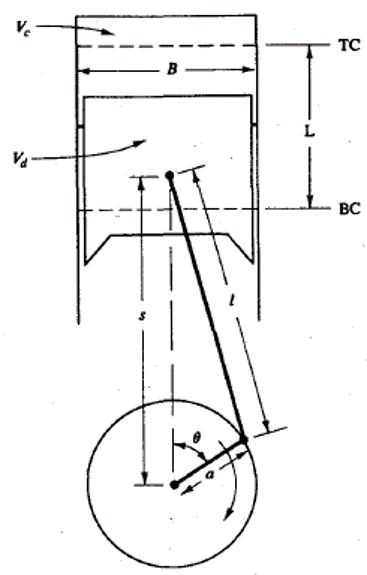

<div align="right">$[J.B. Heywood, 2018]$ <br> <br>
<center> 4. att. Cilindra, virzuļa un kloķa-klaņa mehānisma ģeometriskie parametri   <br>
    
    

<div align="left"> Vienādojums cilindra darba tilpuma aprēķinam: <br>

 $$V_d=\frac {\pi \cdot B^2 \cdot L}{4}$$
 kur<br>
&emsp;&emsp;$V_d$ - cilindra darba tilpums, $ m^{3};$<br>
&emsp;&emsp;$B$ - cilindra diametrs, $m;$,<br>
&emsp;&emsp;$L$ - virzuļa gājiens, $m.$<br>
Vienādojums kompresijas telpas tilpuma aprēķinam: <br>

 $$V_c=\frac {V_d}{CR-1}$$
 kur<br>
&emsp;&emsp;$V_c$ - kompresijas telpas tilpums, $ m^{3};$<br>
&emsp;&emsp;$CR$ - kompresijas pakāpe.$<br>
Attālums starp kloķvārpstas asi un virzuļa pirksta asi pie jebkura CAD aprēķināms šādi:

$$s=a \cdot \cos\theta + (l^2-a^2 \cdot sin^2\theta)^\frac{1}{2}$$
 kur<br>
&emsp;&emsp;$a$ - kloķa garums, $ m;$<br>
&emsp;&emsp;$l$ - klaņa garums $m;$,<br>
&emsp;&emsp;$\theta$ - kloķvārpstas pagrieziena leņķis, $grādi.$<br>

Kloķa garums:

$$a=\frac {L}{2} $$ <br>

Motora cilindra pilnais tilpums pie jebkura CAD aprēķināms šādi:

$$V_\theta=V_c + \frac {\pi \cdot B^2 \cdot L}{4} \cdot (l+a+s)$$ <br>

Savukārt motora cilindra pilnā tilpuma diferenciālis pie jebkura CAD analītiski aprēķināms šādi:

$$\frac {dV_\theta}{d \theta}=\frac {\pi \cdot B^2 }{4} \cdot \left(\frac {a \cdot sin\theta + a^2 \cdot sin 2  \theta}{\sqrt{2\cdot(l^2-a^2 \cdot sin^2\theta}}\right) \cdot \frac {\pi}{180} $$ <br>

Var izlīdzēties arī ar vienkāršāku diferencēšanas paņēmienu:

$$ \frac {dV_\theta}{d \theta}=\frac {V_{\theta(i+1)} - V_{\theta(i)}} {\theta_{(i+1)} - \theta_{(i)}} $$

 kur<br>
&emsp;&emsp;$i$ - datu punkts (spiediens un CAD kādā motora darba cikla brīdī).<br>

Nākamajā koda fragmentā izsaucam funkciju, (atsevišku koda fragmentu), kura uzdevums ir aprēķināt nepieciešamos cilidra tilpuma paramaterus:
- kloķvārpstas pagrieziena lenķi katrā aprēķinu solī (CAD);
- cilindra darba tilpumu (Vd);
- kompresijas telpas tilpumu (Vc);
- cilindra pilno tilpumu pie katra kloķvārpstas pagrieziena grāda (Vth);
- cilindra tilpuma izmaiņas (diferenciāli), kloķvārpstai pagriežoties par noteiktu leņķi (dVth). <br>
Šeit kodā ir iekļauts tikai funkcijas faila un funkcijas nosaukums, tās arguments (šajā gadījumā tikai kompresijas pakāpe) un aprēķinu rezultāti.
Pats funkcijas kods ir atverams un apskatāms šī projekta galvenajā direktorijā, faila nosaukums, ***fc_volume.py*** <br>
    
    
Tajā ir iekļauti motora sadegšanas kameras izmēri un vienādojumi aprēķinu veikšanai.<br>




In [3]:
from fc_volume import volume #call function to calculate volume
Vd, Vc, Vth, dVth, cad =volume (CR)

Cilindra tilpuma izmaiņas  visā motora darba ciklā varam aplūkot, izveidojot koda fragmentu, kas ģenerē sekojošu diagrammu: 

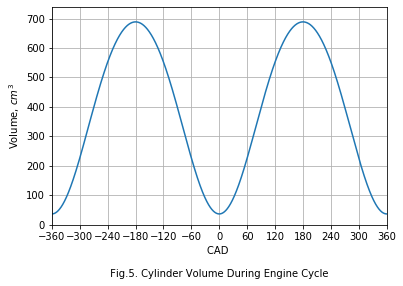

In [4]:
#Create cylinder volume plot

fig, ax = plt.subplots()
ax.grid()
ax.set_ylabel('Volume, $cm^3$')
ax.set_xlabel('CAD \n \n Fig.5. Cylinder Volume During Engine Cycle ')

maxval=np.max(Vth*10**6)
ylim=maxval+50
ax.set_xlim(-360, 360)
ax.set_ylim(0, ylim)

ax.xaxis.set_major_locator(MultipleLocator(60)) # distribute major ticks on x axis

line, = ax.plot(cad-360, Vth*10**6, label=('Volume'))

plt.show()

<center> <h3> Gāzes spiediens cilindrā motora darba ciklā

Tagad, kad ir kloķvārpstas leņķa vektors $CAD$ (skaitļu rinda 0.1, 0.2 ... 720), kas sagatavota ar funkciju ***volume***, varam izveidot cilindra spiediena izmaiņu diagrammas, sastādot kodu: <br>

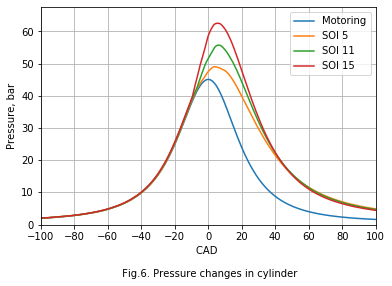

In [5]:
# Create cylinder pressure plot
fig, ax = plt.subplots()
ax.grid()
ax.set_ylabel('Pressure, bar')
ax.set_xlabel('CAD \n \n Fig.6. Pressure changes in cylinder')

maxval=np.max([np.max(P_Test1), np.max(P_Test2), np.max(P_Test3), np.max(P_Test4)])
ylim=maxval+5
ax.set_xlim(-100, 100)
ax.set_ylim(0, ylim)
ax.xaxis.set_major_locator(MultipleLocator(20)) # distribute major ticks on x axis
line, = ax.plot(cad-360, P_Test1, label=label_Test1)
line, = ax.plot(cad-360, P_Test2, label=label_Test2)
line, = ax.plot(cad-360, P_Test3, label=label_Test3)
line, = ax.plot(cad-360, P_Test4, label=label_Test4)
ax.legend()
plt.show()

Redzams, ka brīvgriešanas režīmā motors ir darbojies kā kompresors, toties režīmos ar degvielas padevi spiediens cilndrā palielinājies, tuvojoties virzuļa augšējam maiņas punktam (0 CAD).<br> Lai gan degvielas daudzums visos režīmos ir līdzīgs, spiediena pieauguma raksturu nozīmīgi ietekmē iesmidzināšanas lenķis (SOI).
***
<br>

<center> <h3> Spiediena un tilpuma diagramma

Pielietojot aprēķinātās motora tilpuma izmaiņas, var izveidot spiediena/ tilpuma diagrammu, kurā vizuāli redzama motora darba cikla norise:
- ieplūde;
- saspiede;
- izplete;
- izplūde. <br>

Tāpat var redzēt gāzu paveiktā darba un sūknēšanas darba lielumu (laukumu ko aptver līknes)

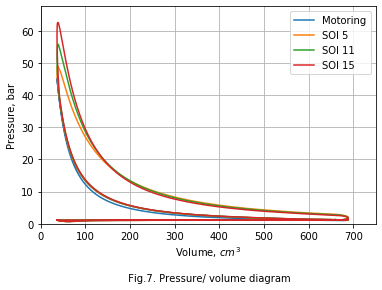

In [6]:
# Create cylinder pressure/volume plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('Pressure, bar')
ax.set_xlabel('Volume, $cm^3$ \n \n Fig.7. Pressure/ volume diagram')

maxval=np.max([np.max(P_Test1), np.max(P_Test2), np.max(P_Test3), np.max(P_Test4)])
ylim=maxval+5
ax.set_xlim(0, 750) #set axe limits
ax.set_ylim(0, ylim)
line, = ax.plot(Vth*10**6, P_Test1, label=label_Test1) #create multilple line plots
line, = ax.plot(Vth*10**6, P_Test2, label=label_Test2)
line, = ax.plot(Vth*10**6, P_Test3, label=label_Test3)
line, = ax.plot(Vth*10**6, P_Test4, label=label_Test4)
ax.legend()
plt.show()

<center> <h3> Spiediena un tilpuma digramma logaritmiskā skalā

Gāzu apmaiņas un sadedzes process labāk redzams, ja p/V diagrammu izveido logaritmiskā skalā. Saspiedes procesa beigās un izplete procesa sākumā, posmā, kurā diagrammas līnija ir izliekta, notiek sadedzes process.

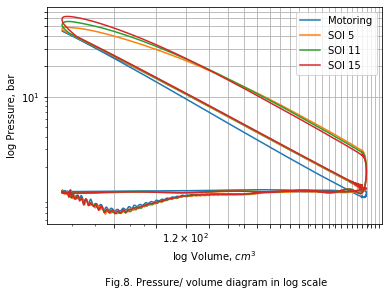

In [7]:
# Create cylinder pressure/volume log plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('log Pressure, bar')
ax.set_xlabel('log Volume, $cm^3$ \n \n Fig.8. Pressure/ volume diagram in log scale')

maxval=np.log(np.max([np.max(P_Test1), np.max(P_Test2), np.max(P_Test3), np.max(P_Test4)]))
ylim=maxval+5
#ax.set_xlim(0, 750) #set axe limits
#ax.set_ylim(0, ylim)
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(30)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on y axis
line, = ax.plot((Vth*10**6), (P_Test1), label=label_Test1) #create multilple line plots
line, = ax.plot(Vth*10**6, P_Test2, label=label_Test2)
line, = ax.plot(Vth*10**6, P_Test3, label=label_Test3)
line, = ax.plot(Vth*10**6, P_Test4, label=label_Test4)
ax.legend()
plt.show()

<center> <h3> Spiediena izmaiņu motora cilindŗā raksturojums

***
$6.$ $attēlā$ parādīto cilnidra spiediena diagrammu var analizēt, lai noteiktu maksimālo spiedienu katrā izmēģinājuma režīmā, kā arī maksimālā spiediena brīdi motora darba ciklā, jeb maksimālā spiediena lenķi. <br>
To var paveikt, uzrakstot kodu. Šim uzdevumam sarakstīts kods un izveidota atsevišķa funkcija, kurai var nosūtīt cilnidra spiediena datus un saņemt divus rezultātus:
- maksimālo spiedienu;
- maksimālā spiediena leņķi. <br>
Funkcijas kods ir atverams un apskatāms šī projekta galvenajā direktorijā, faila nosaukums, fc_maxp.py <br>
Importējam funkciju un izsaucam to 4 reizes:
    

In [8]:
from fc_maxp import maxp #call function to find maximal pressure
PMax_Test1, PMax_cad_Test1 =maxp (P_Test1, cad)
PMax_Test2, PMax_cad_Test2 =maxp (P_Test2, cad)
PMax_Test3, PMax_cad_Test3 =maxp (P_Test3, cad)
PMax_Test4, PMax_cad_Test4 =maxp (P_Test4, cad)

<center> <h3> Maksimālais spiediens cilindrā motora darba ciklā

Maksimālo spiedienu visos izmēģinājumu režīmos varam attēlot grafiski, sastādot kodu:

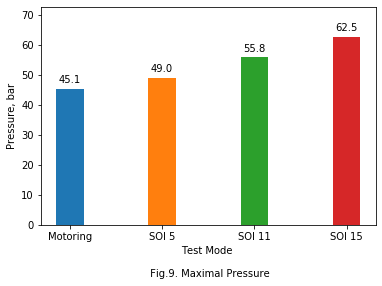

In [9]:
# Create bar plot for Pmax
Pmax = [PMax_Test1, PMax_Test2 ,PMax_Test3,PMax_Test4]

x = np.arange(np.size(Pmax)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, Pmax,width=0.3, color=['C0','C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (Pmax[index]+2), str(np.round(Pmax[index],1)),horizontalalignment='center')
    
ax.set_ylabel('Pressure, bar')
ax.set_xlabel('Test Mode \n \n Fig.9. Maximal Pressure')


ylim=np.round((np.max(Pmax)+10),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_all)
plt.show()

<center> <h3> Maksimālā spiediena leņķis

Savukārt maksimālā spiediena leņķis visos izmēģinājumu režīmos redzams, sastādot līdzīgu kodu:

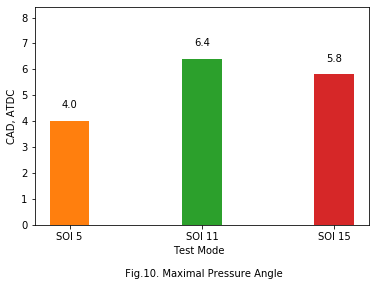

In [10]:
# Create bar plot for Pmax cad
Pmax_cad = [PMax_cad_Test2,PMax_cad_Test3,PMax_cad_Test4]

x = np.arange(np.size(Pmax_cad)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, Pmax_cad,width=0.3, color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (Pmax_cad[index]+0.5), str(np.round(Pmax_cad[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD, ATDC')
ax.set_xlabel('Test Mode  \n \n Fig.10. Maximal Pressure Angle')

ylim=np.round((np.max(Pmax_cad)+2),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

Lielāko griezes momentu motors attīsta, ja maksimālā spiediena leņķis ir aptuveni 14...16 CAD pēc augstākā maiņas punkta (AMP). <br>
Tas gan vairāk attiecas uz dzirksteļaizdedzes motoriem, bet redzēsim, kā ir šajā gadījumā.

<center> <h3> Indicētais vidējais efektīvais spiediens

***

Indicētais vidējais  efektīvais spiediens (IMEP) raksturo motora darba tilpuma izmantošanu. Jo tā vērtība augstāka, jo motora darba tilpums vairāk un efektīvāk izmantots. IMEP var aprēķināt visam motora darba ciklam, un tad dēvē par $IMEP_{net}$, vai arī tikai saspiedes un izpletes procesiem ($IMEP_{gross}$. Lai gan $IMEP_{net}$ aptver lielāku motora cikla daļu, tā vērtība vienmēr ir zemāka par $IMEP_{gross}$, jo netiek ietverts gāzu apmaiņai nepieciešamais darbs. <br>
IMEP var aprēķināt, dalot gāzu paveikto darbu ar motora darba tilpumu. Būtībā ir jāaprēķina laukums, ko iezīmē līkne spiediena/ tilpuma diagrammā. To var paveikt, veicot skaitlisku integrēšanu. Vispārīgais vienādojums ir sekojošs:

 $$IMEP=\frac {\oint p_\theta \cdot dV_\theta}{V_d}$$ <br>
 
 Gross gadījumā skaitliski integrē spiediena un tilpuma diferenciāļa reizinājumu tikai saspiedes un izpletes procesos (apmēram - 180 ... + 540 CAD). Savukārt Net gadījumā izvēlas visu motora ciklu (720 CAD). <br>
 $IMEP_{gross}$ un $IMEP_{net}$ starpība ļauj novērtēt gāzu apmaiņas darbu jeb radītos zudumus.


Izveidosim funkciju, kas aprēķina vidējo efektīvo spiedienu. Funkcijas kods ir atverams un apskatāms šī projekta galvenajā direktorijā, faila nosaukums, ***fc_imep.py*** <br>
Importējam funkciju, un izsaucam to 4 reizes:


In [11]:
from fc_imep import imep #call function to calculate IMEP
IMEP_Test1, IMEP_gross_Test1 =imep (P_Test1, dVth, Vd)
IMEP_Test2, IMEP_gross_Test2 =imep (P_Test2, dVth, Vd)
IMEP_Test3, IMEP_gross_Test3 =imep (P_Test3, dVth, Vd)
IMEP_Test4, IMEP_gross_Test4 =imep (P_Test4, dVth, Vd)

Rezultāts būs redzams, ja izvadīsim to uz ekrāna. To var paveikt, veidojot diagrammu:

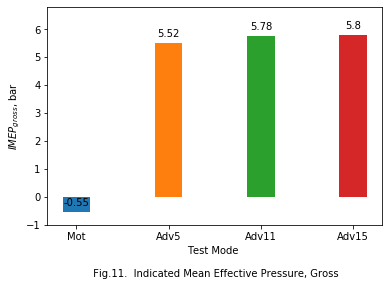

In [12]:
# Create bar plot for IMEP
IMEP = [IMEP_gross_Test1, IMEP_gross_Test2 ,IMEP_gross_Test3,IMEP_gross_Test4]
labels = ['Mot', 'Adv5', 'Adv11', 'Adv15']
x = np.arange(np.size(IMEP)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, IMEP,width=0.3,color=['C0','C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (IMEP[index]+0.2), str(np.round(IMEP[index],2)),horizontalalignment='center')
    
ax.set_ylabel('$IMEP_{gross}$, bar')
ax.set_xlabel('Test Mode \n \n Fig.11.  Indicated Mean Effective Pressure, Gross')

ylim=np.round((np.max(IMEP)+1),2)
ax.set_ylim(-1, ylim)
plt.xticks(x, labels)
plt.show()

Redzams, ka brīvgriešanā IMEP ir negatīvs, jo gaisa saspiešana rada tā sasilšanu un siltuma pārnesi. Savukārt pārējos režīmos IMEP vērtību ietekmē iesmidzināšanas leņķis (SOI). IMEP ir tieši proporcionāls motora indicētajam griezes momentam. Tomēr redzams, ka SOI ietekme uz cilindra spiediena veidošanos ir daudz lielāka, nekā uz IMEP, un attiecīgi, uz griezes momentu.

<center> <h3> Vidējā gāzu temperatūra motora cilindrā

***

Gāzes temperatūras sadalījums motora cilindrā ir nevienmērgs, īpaši sadedzes procesa laikā. Ar vienkāršiem paņēmieniem, zinot vielas daudzumu, spiedienu un tilpumu, var aprēķināt vidējo gāzes temperatūru motora cilindrā un tās izmaiņas motora darba cikla daļā, kurā nenotiek gāzu apmaiņa caur vārstiem. <br>
Aprēķinu var sākt ar gaisa blīvuma vērtības noskaidrošanu zināmos apstākļos, saspiedes sākumā: 

$$\rho_{gaiss}=\frac{p_1}{R_i \cdot T_1}$$
 kur<br>

&emsp;&emsp;$\rho_{gaiss}$ - blīvums, $ kg/m^3;$<br>
&emsp;&emsp;$p_1$ - gaisa spiediens ieplūdes kolektorā saspiedes sākumā, $ Pa;$<br>
&emsp;&emsp;$R_i$ - individuālā gāzes konstante gaisam, $287$ $J/ kg \cdot K;$,<br>
&emsp;&emsp;$T_1$ - temperatūra ieplūdes kolektorā saspiedes sākumā, $K.$<br>

Tad gaisa masa cilindrā ir:

$$m_{gaiss}=\rho_{gaiss} \cdot V_{cyl}$$
 kur<br>

&emsp;&emsp;$V_{cyl}$ - cilindra pilnais tilpums, $V_d+V_c$, $ m^3.$<br>

Vidējo temperatūru cilindrā pie noteikta kloķvārpstas pagrieziena leņķa var aprēķināt, lietojot idelās gāzes stāvokļa vienādojumu:

$$T_{\theta}=\frac {p_{\theta} \cdot V_{\theta}}{(m_{gaiss}+m_{degviela}) \cdot R_i}$$
<br>

Degvielas masu cilindrā var aprēķināt, zinot degvielas tilpuma patēriņu minūtē, motora rotācijas ātrumu, kloķvārpstas apgriezienu skaitu vienā motora ciklā un degvielas blīvumu. Šie paramteri doti apraksta sākumā. <br>

Temperatūra tiek aprēķināta ar atsevišķu funkciju. Tās kods ir atverams un apskatāms šī projekta galvenajā direktorijā, faila nosaukums, ***fc_Tcyl.py*** <br>





In [13]:
#Calculation of average temperature in cylinder

from fc_Tcyl import Tcyl

Tcyl_Test1, cad_st= Tcyl (P_Test1, CR, Speed)
Tcyl_Test2, cad_st= Tcyl (P_Test2, CR, Speed)
Tcyl_Test3, cad_st= Tcyl (P_Test3, CR, Speed)
Tcyl_Test4, cad_st= Tcyl (P_Test4, CR, Speed)

Rezultātu var aplūkot, veidojot diagrammu:

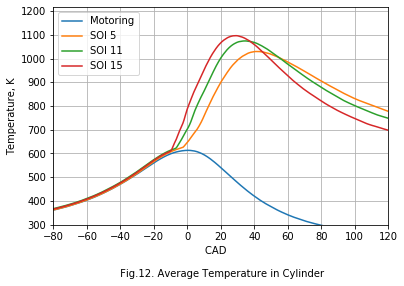

In [14]:
# Create average temperature in cylinder plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('Temperature, K')
ax.set_xlabel('CAD   \n \n Fig.12. Average Temperature in Cylinder')

maxval=np.max([np.max(Tcyl_Test1), np.max(Tcyl_Test2), np.max(Tcyl_Test3), np.max(Tcyl_Test4)])
ylim=maxval+120
ax.set_xlim(-80, 120) #set axe limits
ax.set_ylim(300, ylim)
ax.xaxis.set_major_locator(MultipleLocator(20)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(100)) # distribute major ticks on y axis
line, = ax.plot(cad_st-360, Tcyl_Test1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_st-360, Tcyl_Test2, label=label_Test2)
line, = ax.plot(cad_st-360, Tcyl_Test3, label=label_Test3)
line, = ax.plot(cad_st-360, Tcyl_Test4, label=label_Test4)
ax.legend()
plt.show()

<center> <h2> Sadedzes procesa analīze

<center> <h3> Siltuma izdalīšanās intensitāte

Cilindra spiediena datus var lietot, lai aprēķinātu sadedzes procesu raksturojošus parametrus:
- siltuma izdalīšanās intensitāti;
- siltuma daudzumu;
- siltuma izdalīšanās sadalījumu motora ciklā.

Šim nolūkam jāaprēķina spiediena diferenciālis. Tā kā reāli mērīti analogi dati ir ar nelieliem traucējumiem un troksni, diferencēšanu labāk veikt ar paņēmienu, kas nodrošina saudzīgu signāla filtru. Viens šāds paņēmiens ir centrālā diferencēšana. Vienkāršotā gadījumā vienādojums ir sekojošs:

$$ \frac {dp_{\theta}}{d\theta}=\frac {p_{\theta(i+n)} - p_{\theta(i-n)}} {\theta_{(i+n)} - \theta_{(i-n)}} $$

 kur<br>
&emsp;&emsp;$i$ - datu punkts (spiediens un CAD kādā motora darba cikla brīdī);<br>
&emsp;&emsp;$n$ - diferencēšanas solis, pieņemsim, 5.<br>

Šķietamā siltuma izdalīšanās intensitāte aprēķināma sekojoši:


$$ \frac {dQ_{\theta}}{d\theta}=\frac {\gamma} {\gamma-1} \cdot p_{\theta} \cdot \frac {dV_{\theta}}{d\theta} \cdot \frac {1}{\gamma-1} \cdot V_{\theta} \cdot \frac {dp_{\theta}}{d\theta} $$

Par šķietamo to dēvē tādēļ, ka, siltuma pārnese nav ievērtēta. <br>

Šķietamo siltuma izdalīšanās daudzumu aprēķina, integrējot intensitāti:

$$Q_{\theta}=\int_{\theta_1}^{\theta_2} {dQ_{\theta}} \cdot {d\theta}$$ <br>

Praktiski šo aprēķinu var veikt ar skaitlisko kumulatīvo integrēšanu. <br>

Vienādojumi un paramteri, kā arī plašāks skaidrojums atrodams iekšdedzes motoru tēmai veltītās grāmatās, piemēram J.B. Heywood, 2018 un R. Stone, 1999.

Sadedzes procesu raksturojošie parametri tiek aprēķināti ar vienu, atsevišķu funkciju, kas apzīmēta ar dQ. Tās kods ir atverams un apskatāms šī projekta galvenajā direktorijā, faila nosaukums, ***fc_dQ.py*** <br>


In [15]:
# Calculate burn rate
from fc_dQ import dQ #call function to calculate combustion parameters

dQ_Test1, Q_Test1, Qr_Test1, IGN_Delay_Test1, HR10_Test1, HR1050_Test1, HR1090_Test1, HR50cad_Test1, cad_s= dQ (P_Test1, CR, SOI_Test1)
dQ_Test2, Q_Test2, Qr_Test2, IGN_Delay_Test2, HR10_Test2, HR1050_Test2, HR1090_Test2, HR50cad_Test2, cad_s= dQ (P_Test2, CR, SOI_Test2)
dQ_Test3, Q_Test3, Qr_Test3, IGN_Delay_Test3, HR10_Test3, HR1050_Test3, HR1090_Test3, HR50cad_Test3, cad_s= dQ (P_Test3, CR, SOI_Test3)
dQ_Test4, Q_Test4, Qr_Test4, IGN_Delay_Test4, HR10_Test4, HR1050_Test4, HR1090_Test4, HR50cad_Test4, cad_s= dQ (P_Test4, CR, SOI_Test4)

Kā redzams, funkcija dQ atgriež salīdzinoši daudz rezultātu. Tos ērtāk novērtēt, lietojot diagrammas.<br>
***


Šķietamā siltuma izdalīšanās intensitātes diagrammu var izveidot, izpildot sekojošu koda fragmentu:

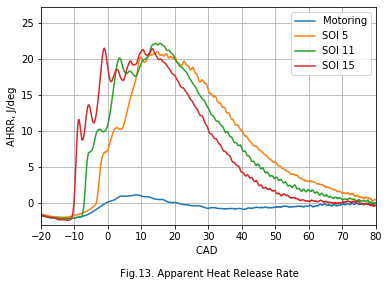

In [16]:
# Create apparent heat release rate plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHRR, J/deg')
ax.set_xlabel('CAD \n \n Fig.13. Apparent Heat Release Rate')

maxval=np.max([np.max(dQ_Test1), np.max(dQ_Test2), np.max(dQ_Test3), np.max(dQ_Test4)])
ylim=maxval+5
ax.set_xlim(-20, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(5)) # distribute major ticks on y axis
line, = ax.plot(cad_s-360, dQ_Test1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_s-360, dQ_Test2, label=label_Test2)
line, = ax.plot(cad_s-360, dQ_Test3, label=label_Test3)
line, = ax.plot(cad_s-360, dQ_Test4, label=label_Test4)
ax.legend()
plt.show()

Intensitāte raksturo, cik strauji sadedzes procesā ir izdalījies siltums. Diagrammā redzams, ka visos izmēģinājumu režīmos pirms augstākā maiņas punkta vērojams negatīva siltuma izdalīšanās intensitāte. To var skaidrot ar siltumapmaiņu starp sakarsēto gaisu uz degkameras sienām. Diagrammā var nodalīt un raksturot atsevišķas sadedzes fāzes un to norisi, atkarībā no iesmidzināšanas leņķa.
Galvenās sadedzes fāzes kompresijas aizdedzes motorā ir:
- aizdegšanās kavējums;
- iepriekš sajaukta degšana;
- difūzijas kontrolēta degšana;
- vēlā degšana. <br>

Detalizēts sadedzes procesa apraksts ir J.B. Heywood, 2018 grāmatā.
***



<center> <h3> Aizdegšanās kavējums

Nozīmīgs sadedzes procesu raksturojošs parametrs ir aizdegšanās kavējums. To var noteikt, analizējot šķietamā siltuma izdalīšanās intensitātes (AHRR) datus. Parasti par aizdegšanās kavējumu pieņem ilgumu starp iesmidzināšanas sākumu un brīdi, kad siltuma izdalīšanās intensitāte kļūst pozitīva. Rezultātu parasti uzrāda kloķvārpstas pageiziena leņķa mērvienībās, lai gan dažkārt to izsaka laika mērvienībās, ms. <br> Šo brīdi var redzēt palielinātā AHRR diagrammā:

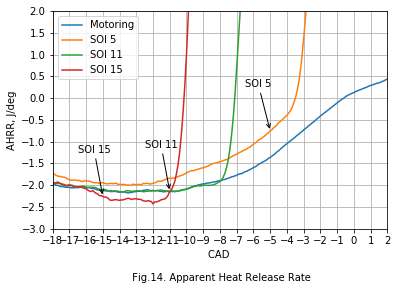

In [17]:
# Create zoomed apparent heat release rate plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHRR, J/deg')
ax.set_xlabel('CAD \n \n Fig.14. Apparent Heat Release Rate')

maxval=np.max([np.max(dQ_Test1), np.max(dQ_Test2), np.max(dQ_Test3), np.max(dQ_Test4)])
ylim=maxval+5
ax.set_xlim(-18, 2) #set axe limits
ax.set_ylim(-3, 2)
ax.xaxis.set_major_locator(MultipleLocator(1)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(0.5)) # distribute major ticks on y axis
line, = ax.plot(cad_s-360, dQ_Test1, label=label_Test1) #create multilple line plots
 #automatic annotation
x_Test2=-SOI_Test2
y_Test2=dQ_Test2[(200-SOI_Test2*10)]

x_Test3=-SOI_Test3
y_Test3=dQ_Test3[(200-SOI_Test3*10)]

x_Test4=-SOI_Test4
y_Test4=dQ_Test4[(200-SOI_Test4*10)]

arrow_SOI_Test2 = ax.annotate('SOI ' + str(SOI_Test2), xy=(x_Test2, y_Test2), xytext=(x_Test2 -1.5, y_Test2 + 1),
            arrowprops=dict(arrowstyle = '->', connectionstyle = 'arc3',facecolor='orange'))
arrow_SOI_Test3 = ax.annotate('SOI ' + str(SOI_Test3), xy=(x_Test3, y_Test3), xytext=(x_Test3 -1.5, y_Test3 + 1),
            arrowprops=dict(arrowstyle = '->', connectionstyle = 'arc3',facecolor='green'))
arrow_SOI_Test4 = ax.annotate('SOI ' + str(SOI_Test4), xy=(x_Test4, y_Test4), xytext=(x_Test4 -1.5 , y_Test4 + 1),
            arrowprops=dict(arrowstyle = '->', connectionstyle = 'arc3',facecolor='red'))

line, = ax.plot(cad_s-360, dQ_Test2, label=label_Test2)
line, = ax.plot(cad_s-360, dQ_Test3, label=label_Test3)
line, = ax.plot(cad_s-360, dQ_Test4, label=label_Test4)
ax.legend()
plt.show()

Režīmā ar SOI 15 arī var redzēt negatīvu siltuma izdalīšanas pēc iesmidzināšanas sākuma, kad šķidrā degviela atdedzesē degkameru. <br>Lai gan aizdegšanās kavējumu var redzēt 14. attēlā, nolasīt datus no diagrammas nav pārāk precīzs un ērts paņēmients. <br>
Aizdegšanās kavējuma vērtību var noskaidrot, lietojot programmas kodu (funkcija dQ), un attēlojot rezultātu grafiski:

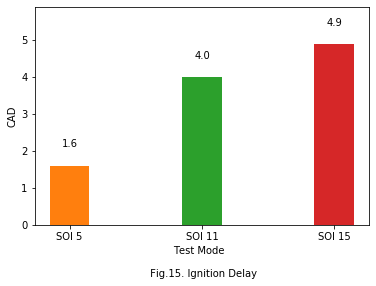

In [18]:
# Create bar plot for Ignition Delay
Ignition_Delay = [IGN_Delay_Test2,IGN_Delay_Test3,IGN_Delay_Test4]

x = np.arange(np.size(Ignition_Delay)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, Ignition_Delay,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (Ignition_Delay[index]+0.5), str(np.round(Ignition_Delay[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
ax.set_xlabel('Test Mode  \n \n Fig.15. Ignition Delay')

ylim=np.round((np.max(Ignition_Delay)+1),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

Redzams, ka vēlāka iesmidzināšana saīsina aizdegšanās kavējumu.
***



<center> <h3> Šķietamais siltuma izdalīšanās daudzums

Šķietamā siltuma izdalīšanās daudzuma diagrammu var izveidot, izpildot sekojošu koda fragmentu:

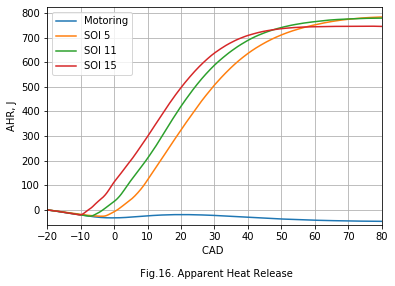

In [19]:
# Create apparent heat release plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHR, J')
ax.set_xlabel('CAD \n \n Fig.16. Apparent Heat Release')

maxval=np.max([np.max(Q_Test1), np.max(Q_Test2), np.max(Q_Test3), np.max(Q_Test4)])
ylim=maxval+40
ax.set_xlim(-20, 80) #set axe limits
ax.set_ylim(-60, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(100)) # distribute major ticks on y axis
line, = ax.plot(cad_s-360, Q_Test1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_s-360, Q_Test2, label=label_Test2)
line, = ax.plot(cad_s-360, Q_Test3, label=label_Test3)
line, = ax.plot(cad_s-360, Q_Test4, label=label_Test4)
ax.legend()
plt.show()

Diagrammā redzams, kā motora ciklā izdalījies siltums, un kāds ir bijis tā šķietamais daudzums. Tā kā degvielas daudzums visos sadedzes izmēģinājuma režīmos ir līdzīgs, atšķirības var izskaidrot ar siltumapmaiņu. <br> Šeit būtu interesanti salīdzināt šķietamo siltuma izdalīšanās daudzumu ar teorētisko, kas rodas pilnībā sadegot degvielai. <br> Degvielas daudzums ciklā un tās sadegšanas siltums ir aprēķināms, lietojot apraksta sākumā iekļautos parametrus - degvielas tilpuma patēriņu, motora darba režīmu un degvielas zemāko siltumspēju.
***


<center> <h3> Šķietamais relatīvais siltuma izdalīšanās daudzums

Šķietamao ***relatīvo*** siltuma izdalīšanās daudzumu motora darba ciklā var aprēķināt sekojoši:

$$Q_{\theta r}=\frac {Q_{\theta}}{Q_{\theta max} }\cdot 100$$

 kur<br>
&emsp;&emsp;$Q_{theta}$ - siltuma izdalīšanās daudzums, J;<br>
&emsp;&emsp;$Q_{\theta max}$ - maksimālais siltuma izdalīšanās daudzums, J;<br>.<br>

Šķietamais relatīvais siltuma izdalīšanās daudzums ir izteikts procentos, un ļauj analizēt sadedzes procesa norisi, savstarpēji salīdzinot dažādas degvielas, darba režīmus un motorus. <br>Šķietamā relatīvā siltuma izdalīšanās daudzuma diagrammu var izveidot, izpildot sekojošu koda fragmentu:

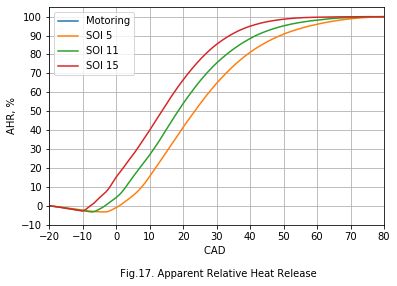

In [20]:
# Create apparent heat release plot
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHR, %')
ax.set_xlabel('CAD \n \n Fig.17. Apparent Relative Heat Release')

ax.set_xlim(-20, 80) #set axe limits
ax.set_ylim(-10, 105)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on y axis
line, = ax.plot(cad_s-360, Qr_Test1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_s-360, Qr_Test2, label=label_Test2)
line, = ax.plot(cad_s-360, Qr_Test3, label=label_Test3)
line, = ax.plot(cad_s-360, Qr_Test4, label=label_Test4)
ax.legend()
plt.show()

<center> <h3> 50% no šķietamā relatīvā siltuma izdalīšanās daudzuma leņķis

Nozīmīgs sadedzes procesa parametrs ir brīdis motora ciklā, kurā izdalījusies puse no sadegšanas siltuma (50% AHR). To nosaka grādos pēc augstākā maiņas punkta. Šo parametru var lietot līdzīgam mērķim, kā maksimālā spiediena punktu - lai noteiktu maksimālajam motora griezes momentam atbilstošu sadedzes sadalījumu. <br> Dzirskteļaizdedzes motoram maksimālajam griezes momentam atbilt 8...10 grādu AHR 50% leņķis. <br> Kompresijas aizdedzes motoram šī parametra vērtībai tik skaidra nozīme nav, tā ir vairāk atkarīga no motora veida. <br>
<br>
Šķietamā siltuma izdalīšanās 50% daudzuma  leņķa diagrammu var izveidot, izpildot sekojošu koda fragmentu:


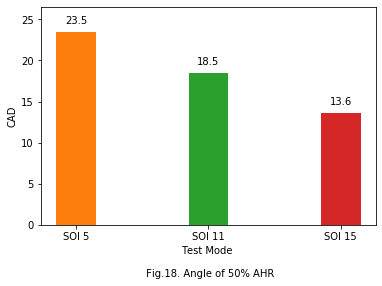

In [21]:
# Create bar plot for 50% AHR
HR50cad = [HR50cad_Test2,HR50cad_Test3,HR50cad_Test4]

x = np.arange(np.size(HR50cad)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR50cad,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (HR50cad[index]+1), str(np.round(HR50cad[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
ax.set_xlabel('Test Mode \n \n Fig.18. Angle of 50% AHR')

ylim=np.round((np.max(HR50cad)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

To, kā šajos izmēģinājuma režīmos 50% AHR leņķis ietekmē motora griezes momentu, var novērtēt, salīdzinot to ar IMEP vērtībām.
***


<center> <h3> Sadedzes sākuma fāzes ilgums

Sadedzes sākuma fāzi var pieņemt no iesmidzināšanas brīža līdz 10% no izdalītā siltuma sasniegšanai, vai arī kādu citu līdzīgu vērtību, piemēram 1% vai 5%. <br> Šis ir vispārpieņemts paņēmiens sadezes raksturošanā, un tam nav tieša sakara ar kompresijas aizdedzes motora sadedzes fāzēm, kuras apskatījām, vizuāli analizējot AHRR līknes. <br> Fāzes ilgumu parasti izsaka kloķvārpstas pagrieziena grādos. Šajā uzdevumā sadedzes sākuma fāzes ilguma noteikšana iekļauta funkcijā ***dQ***. <br> Sadedzes sākuma fāzes ilguma diagrammu var izveidot, izpildot sekojošu koda fragmentu:

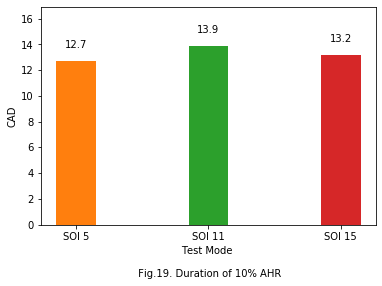

In [22]:
# Create bar plot for duration of 10% AHR
HR10 = [HR10_Test2,HR10_Test3,HR10_Test4]

x = np.arange(np.size(HR10)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR10,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (HR10[index]+1), str(np.round(HR10[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
ax.set_xlabel('Test Mode \n \n Fig.19. Duration of 10% AHR')

ylim=np.round((np.max(HR10)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

<center> <h3> Sadedzes ilgums no 10% līdz 50% no AHR

Sadedzes ilgums no sākuma fāzes līdz pusei no izdalītā siltuma sasniegšanai var noderēt degvielas vai motora darbības raksturošanai.
Sadedzes no 10% līdz 50% no AHR ilguma diagrammu var izveidot, izpildot sekojošu koda fragmentu:

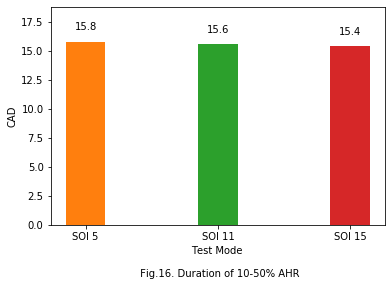

In [23]:
# Create bar plot for duration of 10% - 50% AHR
HR1050 = [HR1050_Test2,HR1050_Test3,HR1050_Test4]

x = np.arange(np.size(HR1050)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR1050,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (HR1050[index]+1), str(np.round(HR1050[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
ax.set_xlabel('Test Mode \n \n Fig.16. Duration of 10-50% AHR')

ylim=np.round((np.max(HR1050)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

<center> <h3> Sadedzes ilgums no 10% līdz 90% no AHR

Sadedzes ilgums no 10% līdz 90% no izdalītā siltuma sasniegšanai raksturo sadezes procesa norisi motora cikla fāzē, kurā tiek radīts griezes moments. Vēlams, lai šis process notiek pēc iespējas īsākā periodā, tādējādi paaugstinot motora lietderīgumu.
Sadedzes no 10% līdz 90% no AHR ilguma diagrammu var izveidot, izpildot sekojošu koda fragmentu:

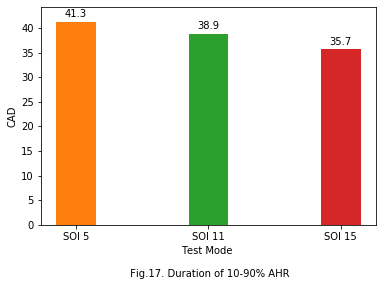

In [24]:
# Create bar plot for duration of 10% - 90% AHR
HR1090 = [HR1090_Test2,HR1090_Test3,HR1090_Test4]

x = np.arange(np.size(HR1090)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR1090,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (HR1090[index]+1), str(np.round(HR1090[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
ax.set_xlabel('Test Mode \n \n Fig.17. Duration of 10-90% AHR')

ylim=np.round((np.max(HR1090)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired)
plt.show()

Ar šo rezultātu vienkāršotu motora cilindra spiediena datu analīzi varētu noslēgt. Vēl ir iepējams aprēķināt indicēto griezes momentu un jaudu, kā arī īpatnējo degvielas patēriņu, lai iegūtu rezultātus, kuri ir saprotamāki plašākam cilvēku lokam.

<center> <h2> Izmantotā literatūra

1. *J. B. Heywood*, ***Internal Combustion Engine Fundamentals***, 2018.
2. *R. Stone*, ***Internal Combustion Engines***, 1999.